In [50]:
%ls data

sample_submission.csv  test.csv  train.csv


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("data/train.csv")

In [53]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### First try - use logistic regression to classify digit 8, not digit 8
is it neccesary to reduce dimensions? Let's try without it.
I'm going to do following steps:
- add new column "is_8" to data with value "1" if it's 8 and "0" if it's not;
- shuffle data
- split data into train and test sets
- with train dataset:
 - prepare feaures, labels, initial weights, learning rate, number of iterations
 - run training
- check predictions on test data

In [54]:
# create target column
df['is_8'] = df['label'] == 8
df = df.astype({'is_8': int})

In [55]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

Splitting dataset in such a strange way, because my laptop hangs trying to train on a full dataset

In [56]:
# 70% of 42000 rows is 29400
train = df[:2000]
test = df[2000:]

In [57]:
# prepare feaures
features = train.loc[:, 'pixel0':'pixel783']
# normalization, because we know that max value is 254
features = features
features.shape

(2000, 784)

In [58]:
# prepare labels
labels = train.loc[:, 'is_8']
labels.shape

(2000,)

In [59]:
#inital weights
weights = np.random.rand(784,1).reshape(-1)
weights.shape

(784,)

In [60]:
# learning rate and number of iterations
learning_rate = 0.001
iterations = 20001

In [61]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

In [62]:
def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

In [63]:
def cost_function(features, labels, weights):
    '''
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)
    
    predictions = predict(features, weights)
    
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1 - labels)*np.log(1 - predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum()/observations

    return cost

In [64]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent
    '''
    N = len(features)

    predictions = predict(features, weights)

    gradient = np.dot(features.T,  predictions - labels)

    # take the average cost derivative for each feature
    gradient /= N

    # multiply the gradient by our learning rate
    gradient *= lr

    # subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [65]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print("iter: " + str(i) + " cost: "+str(cost))

    return weights, cost_history

In [81]:
trained_weights, cost_history = train(features, labels, weights, learning_rate, iterations)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


iter: 0 cost: 1.25843188528e-05
iter: 1000 cost: 1.19385562417e-05
iter: 2000 cost: 1.13683413484e-05
iter: 3000 cost: 1.08600095413e-05
iter: 4000 cost: 1.04030233713e-05
iter: 5000 cost: 9.98917887185e-06
iter: 6000 cost: 9.61201781968e-06
iter: 7000 cost: 9.26639299901e-06
iter: 8000 cost: 8.94814846169e-06
iter: 9000 cost: 8.65388513189e-06
iter: 10000 cost: 8.3807887164e-06
iter: 11000 cost: 8.12650258353e-06
iter: 12000 cost: 7.88903295769e-06
iter: 13000 cost: 7.66667738507e-06
iter: 14000 cost: 7.45797007199e-06
iter: 15000 cost: 7.26163958037e-06
iter: 16000 cost: 7.07657567994e-06
iter: 17000 cost: 6.90180307111e-06
iter: 18000 cost: 6.73646032826e-06
iter: 19000 cost: 6.57978285744e-06
iter: 20000 cost: 6.43108897641e-06


In [67]:
predictions = predict(test.loc[:, 'pixel0':'pixel783'], trained_weights)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [68]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

In [69]:
def classify(preds):
    '''
    input  - N element array of predictions between 0 and 1
    output - N element array of 0s (False) and 1s (True)
    '''
    decision_boundary_v = np.vectorize(decision_boundary)
    return decision_boundary_v(predictions).flatten()

In [70]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [71]:
predicted_labels = classify(predictions)
actual_labels = test.loc[:, 'is_8']

In [72]:
accuracy(predicted_labels, actual_labels)

0.88455

In [73]:
len(predicted_labels), np.count_nonzero(actual_labels), np.count_nonzero(predicted_labels), np.count_nonzero(predicted_labels*actual_labels)

(40000, 3867, 5625, 2437)

In [74]:
np.count_nonzero(predicted_labels*actual_labels) / np.count_nonzero(actual_labels)

0.6302042927333851

In [75]:
precision = np.count_nonzero(predicted_labels*actual_labels) / np.count_nonzero(predicted_labels)

In [76]:
recall = np.count_nonzero(predicted_labels*actual_labels) / np.count_nonzero(actual_labels)

In [77]:
f1 = 2*precision*recall/(precision + recall)

In [78]:
f1

0.5134850400337125

In [79]:
trained_weights.shape

(784,)

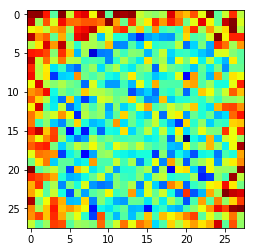

In [80]:
weights_pic = trained_weights.reshape(28, 28)
plt.imshow(weights_pic, cmap='jet')